# Wrangling Project for the tweet archive of @dogs_rates twitter account

In [1]:
# Importing the required libraries

import pandas as pd
import os
import numpy as np
import requests as rq
import tweepy
import json
import timeit

# Wrangling Data Steps

First,

# Gathering the Data 

Through,

1. **CSV file**:  Manual downloading "twitter-archive-enhanced.csv" then reading it as a Data Frame
2. **Programmatic downloading a TSV file**:  downloading "image-predictions.tsv" file then reading it as a DataFrame
3. **API** : Using Twitter API to access the tweet archive of @dos_rates, downloading the data to a txt file the   reading it as a Data Frame

In [2]:
#Importing Data from a CSV file

tweets_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Programmatic downloading the image-predicitons.tsv file

url      = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

with open(os.path.join(url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)
    
images_predictions_df = pd.read_csv('image-predictions.tsv','\t')

In [4]:
#Importing Data from "tweet_json.txt"


tweets_df = pd.read_json('tweet-json.txt', lines = True)

**End of Data Gathering Stage**

===========================================

Then,


# Assessing the Data
Programmatic Data Assessment, then documenting the notes found to be cleaned


**Assessment will be done separately for each of the gathered data**



In [5]:
# Creating a copy of the Gathered Data

tweets_archive_df_copy    = tweets_archive_df.copy()
images_df_copy            = images_predictions_df.copy()
tweets_df_copy            = tweets_df.copy()

In [6]:
# Manual Assesing of the Gatherd Data 

# tweets_archive_df

tweets_archive_df_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1268,709556954897764353,NaN,NaN,2016-03-15 01:48:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cecil. She's a Gigglefloof Poofer. Out...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709556954...,12,10,Cecil,None,None,None,None
2147,669753178989142016,NaN,NaN,2015-11-26 05:42:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester. He just ate a lot and now he can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669753178...,10,10,Chester,None,None,None,None
2219,668496999348633600,NaN,NaN,2015-11-22 18:31:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jo. Jo is a Swedish Queso. Tongue bigg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668496999...,8,10,Jo,None,None,None,None
495,813172488309972993,NaN,NaN,2016-12-26 00:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eleanor. She winks like she knows many...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,None,None,None,None
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaN,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None


In [7]:
# Checking Columns' data types and Occurrence of Null values

tweets_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# Checking for duplicates

tweets_archive_df_copy.duplicated().sum()

0

In [9]:
# Checking for the Columns withe Null values and number of Null values

# Most Important for me is "tweet_id" column

tweets_archive_df_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## "Tweets Archive" Assessment Summary


### Quality Assessment

1. **Wrong Data Type**: Timestamp Column should be converted to a datetime format rather than an object
2. **Unnecessary Columns**: There are un wanted columns for the retweets and text data (5 cols)
3. **Unnecessary Rows**: There are un wanted Rows for the retweets data (181 rows)
4. **Missing Values**: There are missing values in "name" column 
5. **Wrong Values**: There are wrong entries in "name" column


### Tidiness Assessment

1. Tweets Data need to be in a separate table
2. Dogs name and ratings need to be in a separate table



In [10]:
# Manual Assessment of Images-predictions

images_df_copy.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston_bull,0.250920,True,whippet,0.141012,True
353,672591271085670400,https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg,1,gondola,0.134290,False,lifeboat,0.108356,False,bassinet,0.093679,False
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,Chihuahua,0.101228,True,hen,0.065818,False
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True


In [11]:
# Checking Columns' data types and Occurrence of Null values

images_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [12]:
# Checking for duplicates

images_df_copy.duplicated().sum()

0

In [13]:
# Checking for duplicates in the Images Urls

images_df_copy['jpg_url'].duplicated().sum()

66

In [14]:
# Checking for the Columns withe Null values and number of Null values

images_df_copy.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## "Images Predictions" Assessment Summary


### Quality Assessment

1.  **There are Upper and Lower Case Letters**: The Letters Case in each of the columns "P1, P2, P3" should be the same for the whole column.  
2. **Duplicates**: There are tweets with images of similar URLs  


### Tidiness Assessment

No Issues



In [15]:
# Manual Assessment of Images-predictions

tweets_df_copy.sample(5)

,tweet_id,retweet_count,favorite_count
1280,707411934438625280,587,2262
997,746726898085036033,1767,5966
1420,696713835009417216,637,2342
1387,698989035503689728,955,3289
147,862457590147678208,4575,19338


In [16]:
# Checking Columns' data types and Occurrence of Null values

tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1924 non-null   int64
 1   retweet_count   1924 non-null   int64
 2   favorite_count  1924 non-null   int64
dtypes: int64(3)
memory usage: 45.2 KB


In [17]:
# Checking for duplicates

sum(tweets_df_copy.duplicated())

0

In [18]:
# Checking for the Columns withe Null values and number of Null values

tweets_df_copy.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

## "Tweets" Assessment Summary


### Quality Assessment

 No Issues
 
### Tidiness Assessment

1. Tweets table need to be merged with other col.s related to the tweets in a new table
2. The number of the rows is less than the number of the rows in the other tables to be merged with



**End of Data Assessment Stage**

                                        ======================================

                                ======================================================

Finally,

# Cleaning the Data

That is, solving the notes taken at the Assessment Stage, 

### Summary of Notes Taken at the Assessment Stage -- Cleaning Points


### Quality Issues


**Tweets Archive**
        
* Wrong Data Type - Cleaning : Convert Timestamp Column data type to be a datetime format rather than an object
* Unnecessarg Rows - Cleaning : Drop the unwanted Rows for the retweets data (181 rows)
* Unnecessary Col.s - Cleaning: Drop the un wanted columns for the retweets and text data (5 cols)
* Missing Values - Cleaning: Replaced missing values in "name" column
* Wrong Values - Cleaning: Drop the wrong entries in "name" column

**Images Predictions**

* There are Upper and Lower Case Letters - Cleaning: Convert all the Letters Case in each of the columns "P1, P2, P3" to be in the lowercase.  
* Duplicates - Cleaning: Drop the tweets with images of similar URLs  

**Tweets** 

 No Issues
 
 
 ### Tidness Issues



**Tweets Archive**

* Merge dogs' stages in a single column named "Stages"
* Merge tweets-related-data in a separate table
* Merge dogs name and ratings in a separate table

**Images Predictions**

* No Issues
 
**Tweets** 
 
* Merge tweets table with other columns related to the tweets in a new table

In [19]:
# - Quality Issue - 
# Solving the "Timestamp" col in Tweets Archive Table's wrong data type Issue

tweets_archive_df_copy['timestamp'] = pd.to_datetime(tweets_archive_df_copy['timestamp'])
tweets_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [20]:
# - Quality Issue - 
#Solving the Issue of the Unnecessary rows (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)

retweets               = tweets_archive_df_copy.retweeted_status_id.isnull()
tweets_archive_df_copy = tweets_archive_df_copy[retweets]

tweets_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [21]:
# - Quality Issue - 
#Solving the Issue of the Unnecessary Col.s (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,text,expanded_urls,source)


tweets_archive_df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis = 1 , inplace = True)

In [22]:
tweets_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   rating_numerator    2175 non-null   int64              
 3   rating_denominator  2175 non-null   int64              
 4   name                2175 non-null   object             
 5   doggo               2175 non-null   object             
 6   floofer             2175 non-null   object             
 7   pupper              2175 non-null   object             
 8   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 127.4+ KB


In [23]:
#- Quality Issue - 
#Solving the issue of "name" col's missing and wrong entries  

tweets_archive_df_copy.name = tweets_archive_df_copy.name.str.replace('^[a-z]+', 'None')


In [24]:
#- Tidiness Issue - 
#Solving the issue of the separated stages columns

tweets_archive_df_copy['stage'] = tweets_archive_df_copy['doggo'].replace('None',' ') + tweets_archive_df_copy['floofer'].replace('None',' ') + tweets_archive_df_copy['pupper'].replace('None',' ') + tweets_archive_df_copy['puppo'].replace('None',' ')

In [51]:
tweets_archive_df_copy['stage'] = tweets_archive_df_copy['stage'].str.strip()
tweets_archive_df_copy['stage'].value_counts()

           1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: stage, dtype: int64

In [56]:
tweets_archive_df_copy['stage'] = tweets_archive_df_copy['stage'].replace('doggofloofer', 'floofer')
tweets_archive_df_copy['stage'] = tweets_archive_df_copy['stage'].replace('doggo  puppo', 'puppo')
tweets_archive_df_copy['stage'] = tweets_archive_df_copy['stage'].replace('', 'None')


tweets_archive_df_copy['stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: stage, dtype: int64

In [ ]:
#- Tidiness Issue -
#Dropping the unnecessary cols. (doggo, floofer, pupper, puppo)

tweets_archive_df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

tweets_archive_df_copy.head()

In [45]:
tweets_archive_df_copy['stage'].replace('    ', 'None', inplace = True)
tweets_archive_df_copy['stage'].value_counts()

           1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: stage, dtype: int64

In [29]:
#- Quality Issue -
#convert all of the col. entries to lowercase letters

images_df_copy['p1'], images_df_copy['p2'], images_df_copy['p3'] = images_df_copy['p1'].str.lower(), images_df_copy['p2'].str.lower(), images_df_copy['p3'].str.lower()

images_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [30]:
#- Quality Issue -
#Dropping tweets of similar imgaes

images_df_copy = images_df_copy.drop_duplicates(subset = 'jpg_url', keep = 'first')

images_df_copy.duplicated().sum()

0

In [57]:
#- Tidiness Issue -
#Merging the three data frames

twts_archives_tweets_API_merged_df = pd.merge(tweets_archive_df_copy,tweets_df_copy, on = 'tweet_id', how = 'inner')

twts_archives_tweets_API_merged_df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,None,7565,35769
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,None,5605,30898
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,None,3715,23238
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,None,7751,39065
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,None,8346,37308


In [58]:
wrangled_data_df = pd.merge(twts_archives_tweets_API_merged_df,images_df_copy, on = 'tweet_id', how = 'inner')

wrangled_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 1586
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1587 non-null   int64              
 1   timestamp           1587 non-null   datetime64[ns, UTC]
 2   rating_numerator    1587 non-null   int64              
 3   rating_denominator  1587 non-null   int64              
 4   name                1587 non-null   object             
 5   stage               1587 non-null   object             
 6   retweet_count       1587 non-null   int64              
 7   favorite_count      1587 non-null   int64              
 8   jpg_url             1587 non-null   object             
 9   img_num             1587 non-null   int64              
 10  p1                  1587 non-null   object             
 11  p1_conf             1587 non-null   float64            
 12  p1_dog              1587 non-null 

In [135]:
#Saving the wrangled data in a new CSV file

wrangled_data_df.to_csv('wrangled_data.csv')

wrangled_data_df['p3_dog'].value_counts()[True]*100/wrangled_data_df['p3'].count()

74.7321991178324

# Visualizing the wrangled data

In [ ]:
#Importing the required lib.s
import seaborn as sns
import matplotlib.pyplot as plt

**Drawing the count of each dog stage**

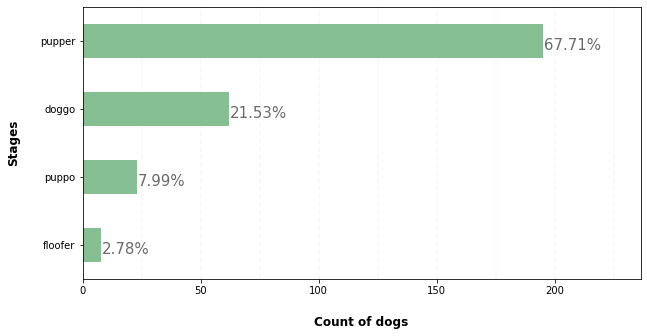

In [237]:


#Stages to be visualized 

stage_df = wrangled_data_df[wrangled_data_df['stage'] != 'None' ]

#drawing horizontal bar chart for the dog's stages 
ax = stage_df['stage'].value_counts().plot(kind='barh', figsize=(10,5), color='#86bf91', zorder=2, width=0.5);
# Draw vertical axis lines      
vals = ax.get_xticks()

for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Count of dogs", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Stages", labelpad=20, weight='bold', size=12);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


**Drawing the count each valid prediction to the total number of prediction for each of p1, p2 and p3**

(-0.5, 2.5, 1100, 1300)

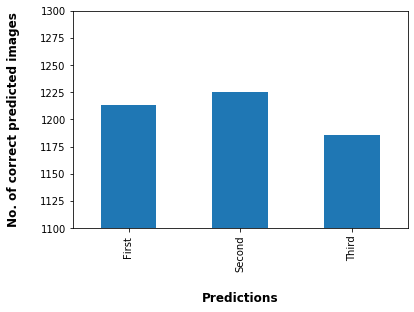

In [226]:
p1_percent = wrangled_data_df['p1_dog'].value_counts()[True]
p2_percent = wrangled_data_df['p2_dog'].value_counts()[True]
p3_percent = wrangled_data_df['p3_dog'].value_counts()[True]

correct_pred = [p1_percent, p2_percent, p3_percent]

index = ['First', 'Second', 'Third']

pred_plot = pd.DataFrame({'Correct': correct_pred}, index=index)

ax = pred_plot.plot.bar(legend=None)

#Set x-axis label
ax.set_xlabel("Predictions", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("No. of correct predicted images", labelpad=20, weight='bold', size=12);
    
ax.axis(ymin = 1100, ymax = 1300)

**Drawing the relationtship between number of retweets and favorites**

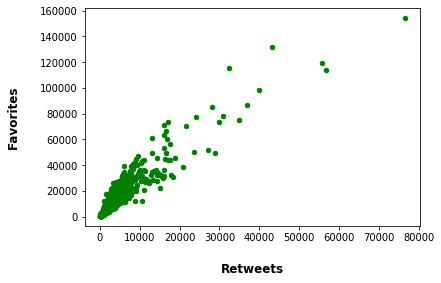

In [227]:
retweets_count  = wrangled_data_df['retweet_count']
favorites_count = wrangled_data_df['favorite_count']



tweet_impressions = pd.concat([retweets_count,favorites_count], axis = 1)

ax = tweet_impressions.plot.scatter(x = 'retweet_count', y = 'favorite_count', color = 'green')

#Set x-axis label
ax.set_xlabel("Retweets", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Favorites", labelpad=20, weight='bold', size=12);